# Configuration de l'environnement

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split, cross_validate, StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, make_scorer, f1_score, precision_recall_curve, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, average_precision_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Chargement des données

In [122]:
# Charger le jeu de donnée
print("Chargement du dataset original...")
original_data = pd.read_csv('housing6month.csv')

# Afficher les premières lignes du dataset
print("\nAffichage des 5 premières lignes du dataset :")
original_data.head()

Chargement du dataset original...

Affichage des 5 premières lignes du dataset :


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Sold6M
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


# Analyse des données

### Structure des données :

In [123]:
# Information basique
print("Information sur le dataset :")
original_data.info()

Information sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  Sold6M              20640 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 1.7+ MB


### Statistiques principaux :

In [124]:
# Statistiques principaux
original_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Sold6M
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.883624
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.320683
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000


### Comptage des données catégorielles :

In [125]:
# Comptage du nombre d'instances pour chaque catégorie d'une variable
print("Nombre de valeur spécifique de chaque catégorie de la variable 'ocean_proximity' :")
original_data["ocean_proximity"].value_counts()

Nombre de valeur spécifique de chaque catégorie de la variable 'ocean_proximity' :


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Gérer les données manquantes

### Vérifier s'il y a des données manquantes :


Nombre total de trous pour chaque variable dans le jeu de donnée original :
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
Sold6M                  0
dtype: int64


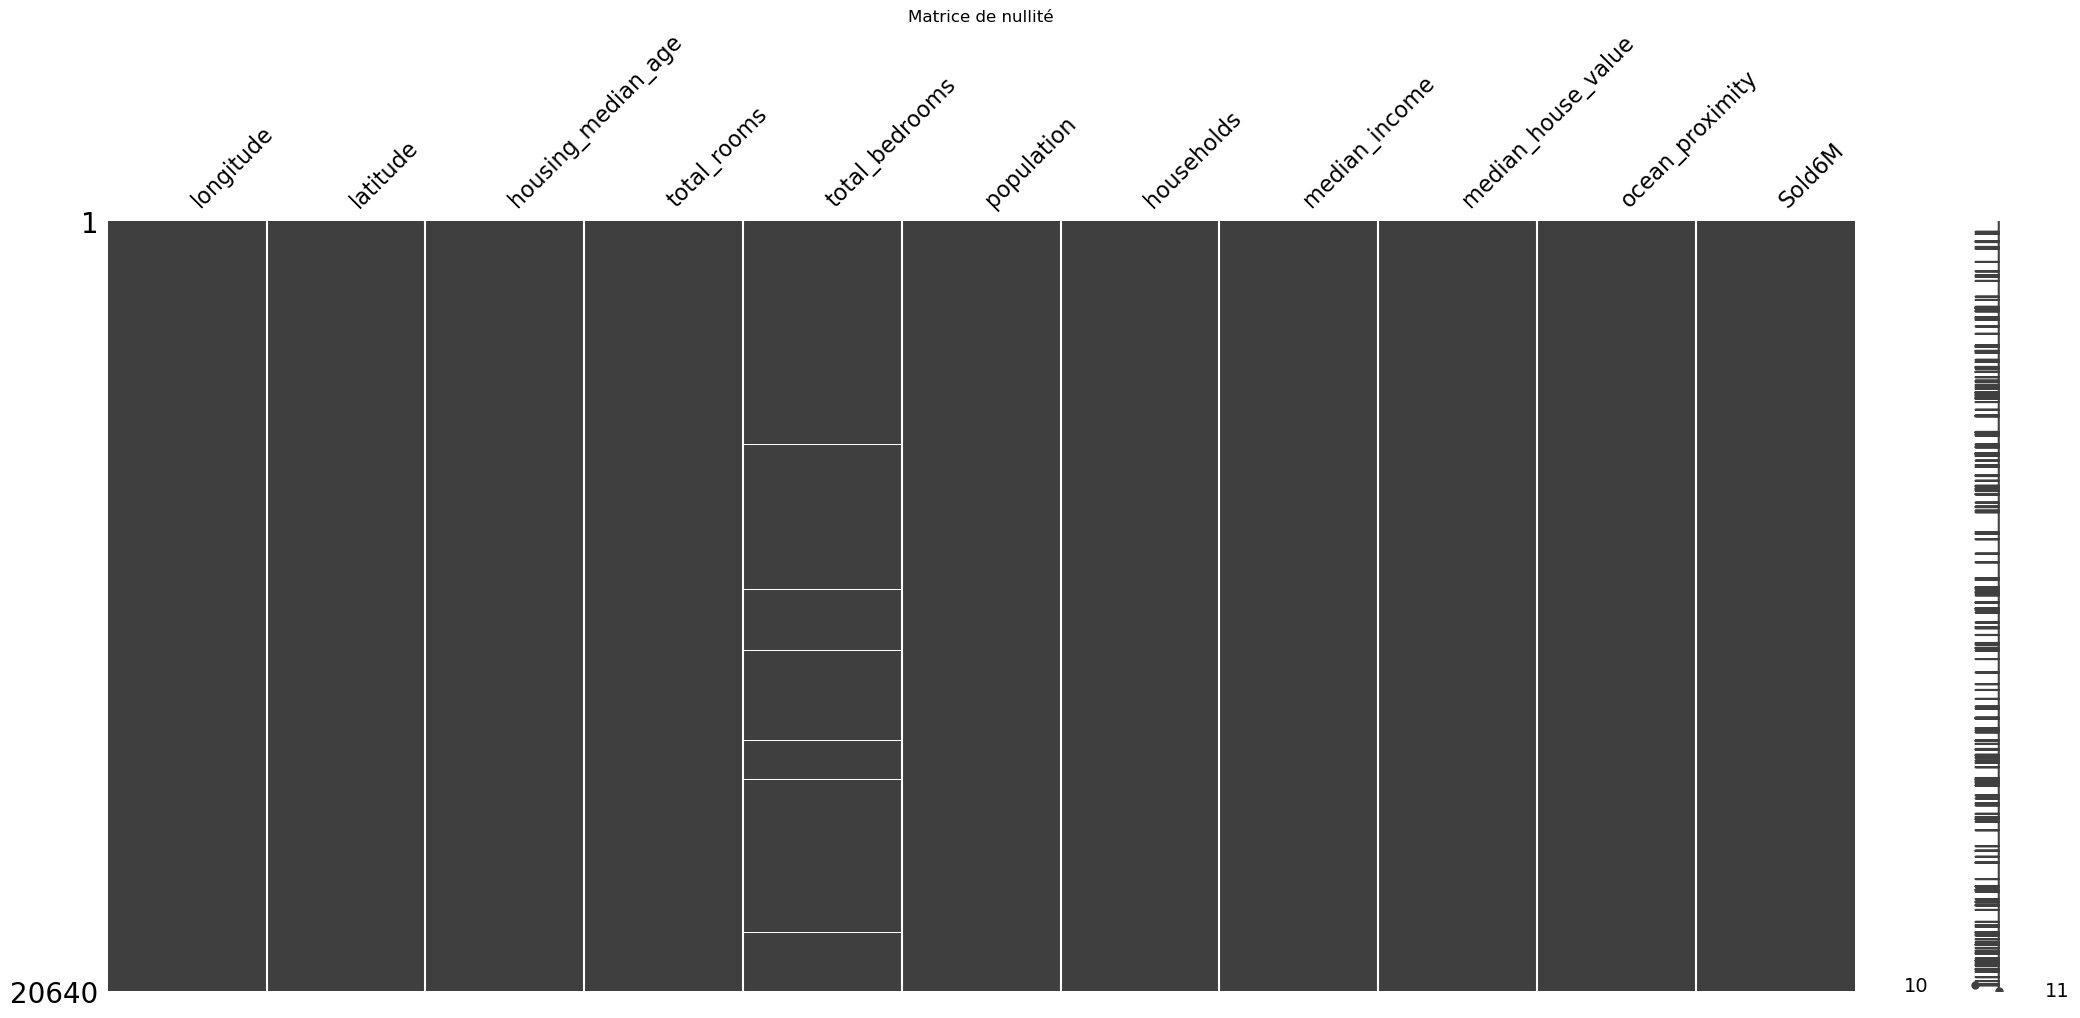

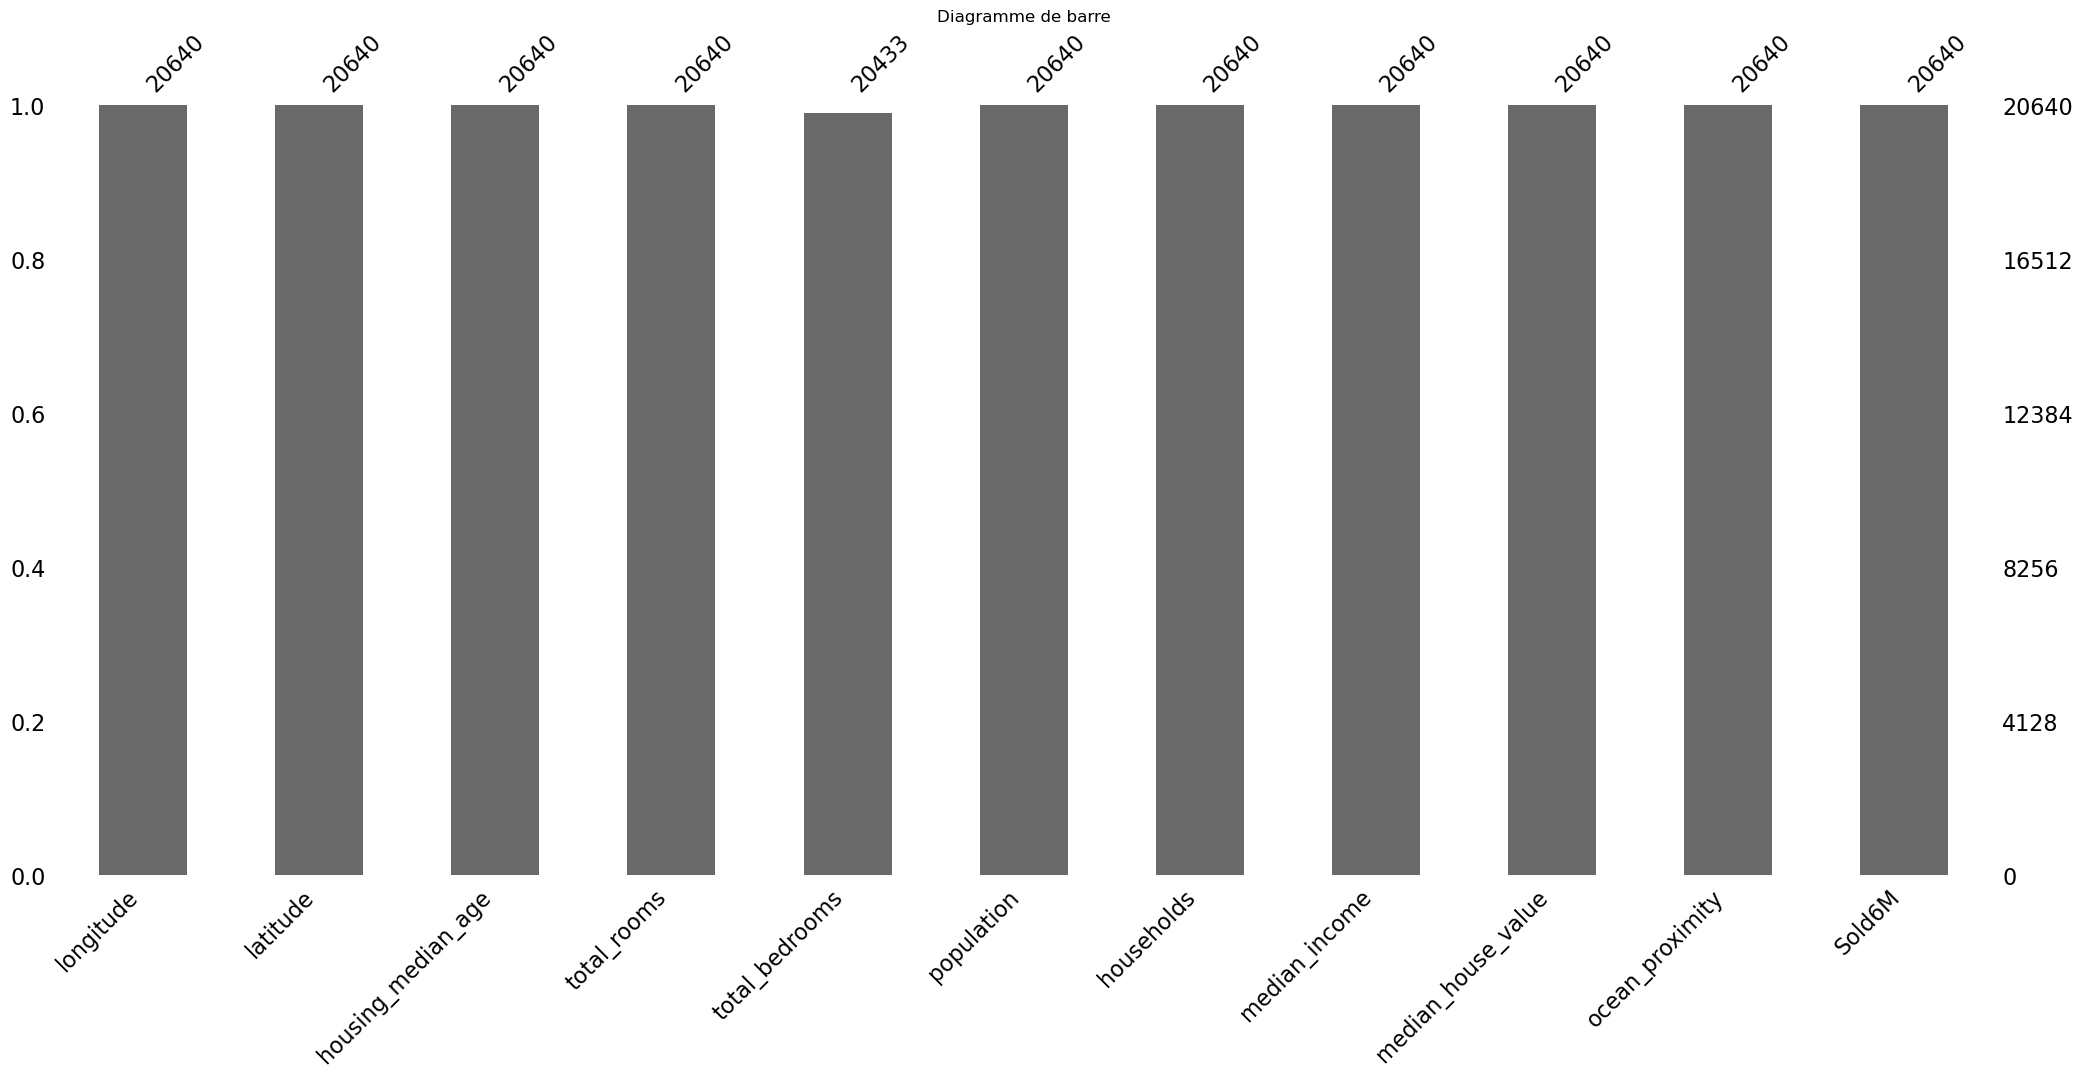

In [126]:
# Somme de toutes les données manquantes pour chaque variables
int_missing_values = original_data.isnull().sum()

print("\nNombre total de trous pour chaque variable dans le jeu de donnée original :")
print(int_missing_values)

# Matrice de nullité
msno.matrix(original_data) 
plt.title("Matrice de nullité")
plt.show()

# Diagramme en bar
msno.bar(original_data) 
plt.title("Diagramme de barre")
plt.show()

### Traitement des données manquantes (imputation) :

Traitement des données manquantes...

Colonnes triés de type numérique :
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'Sold6M'],
      dtype='object')


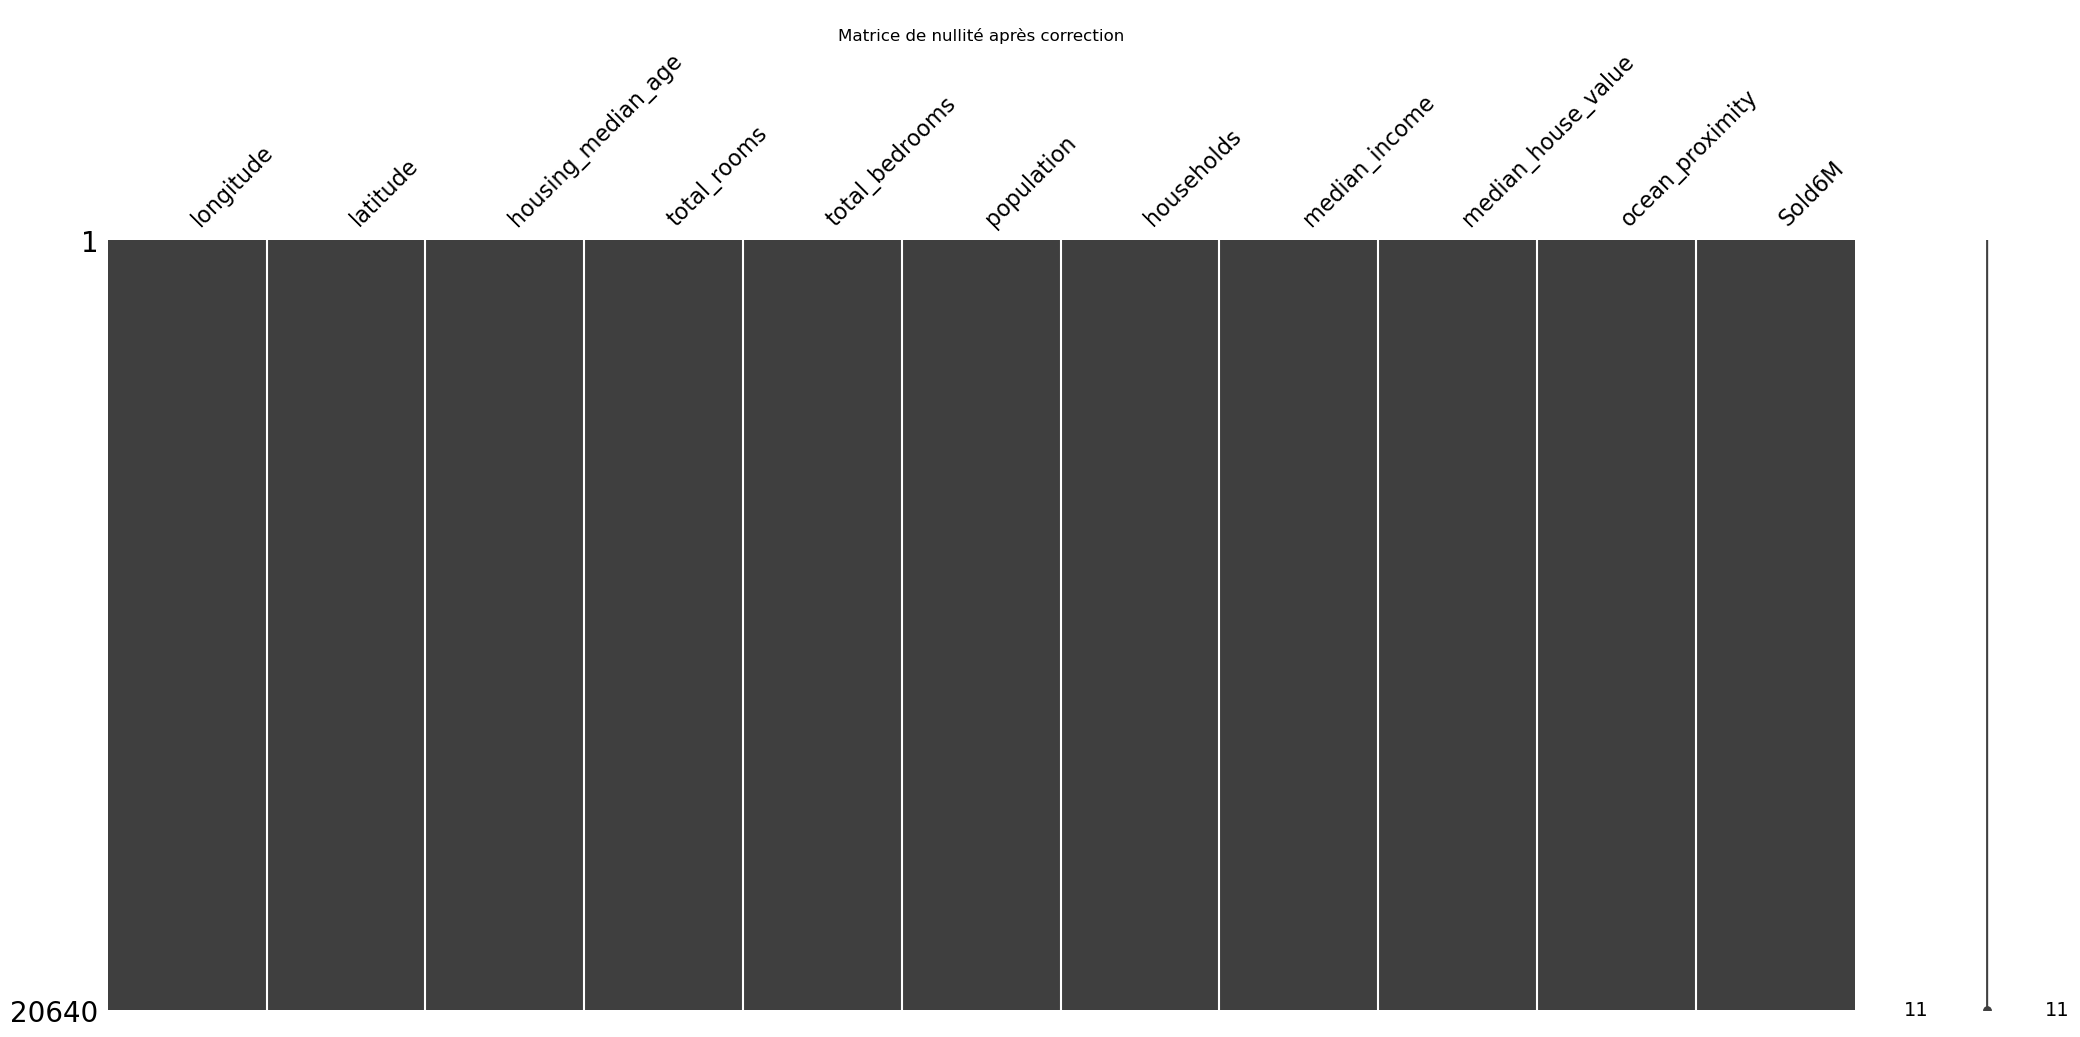

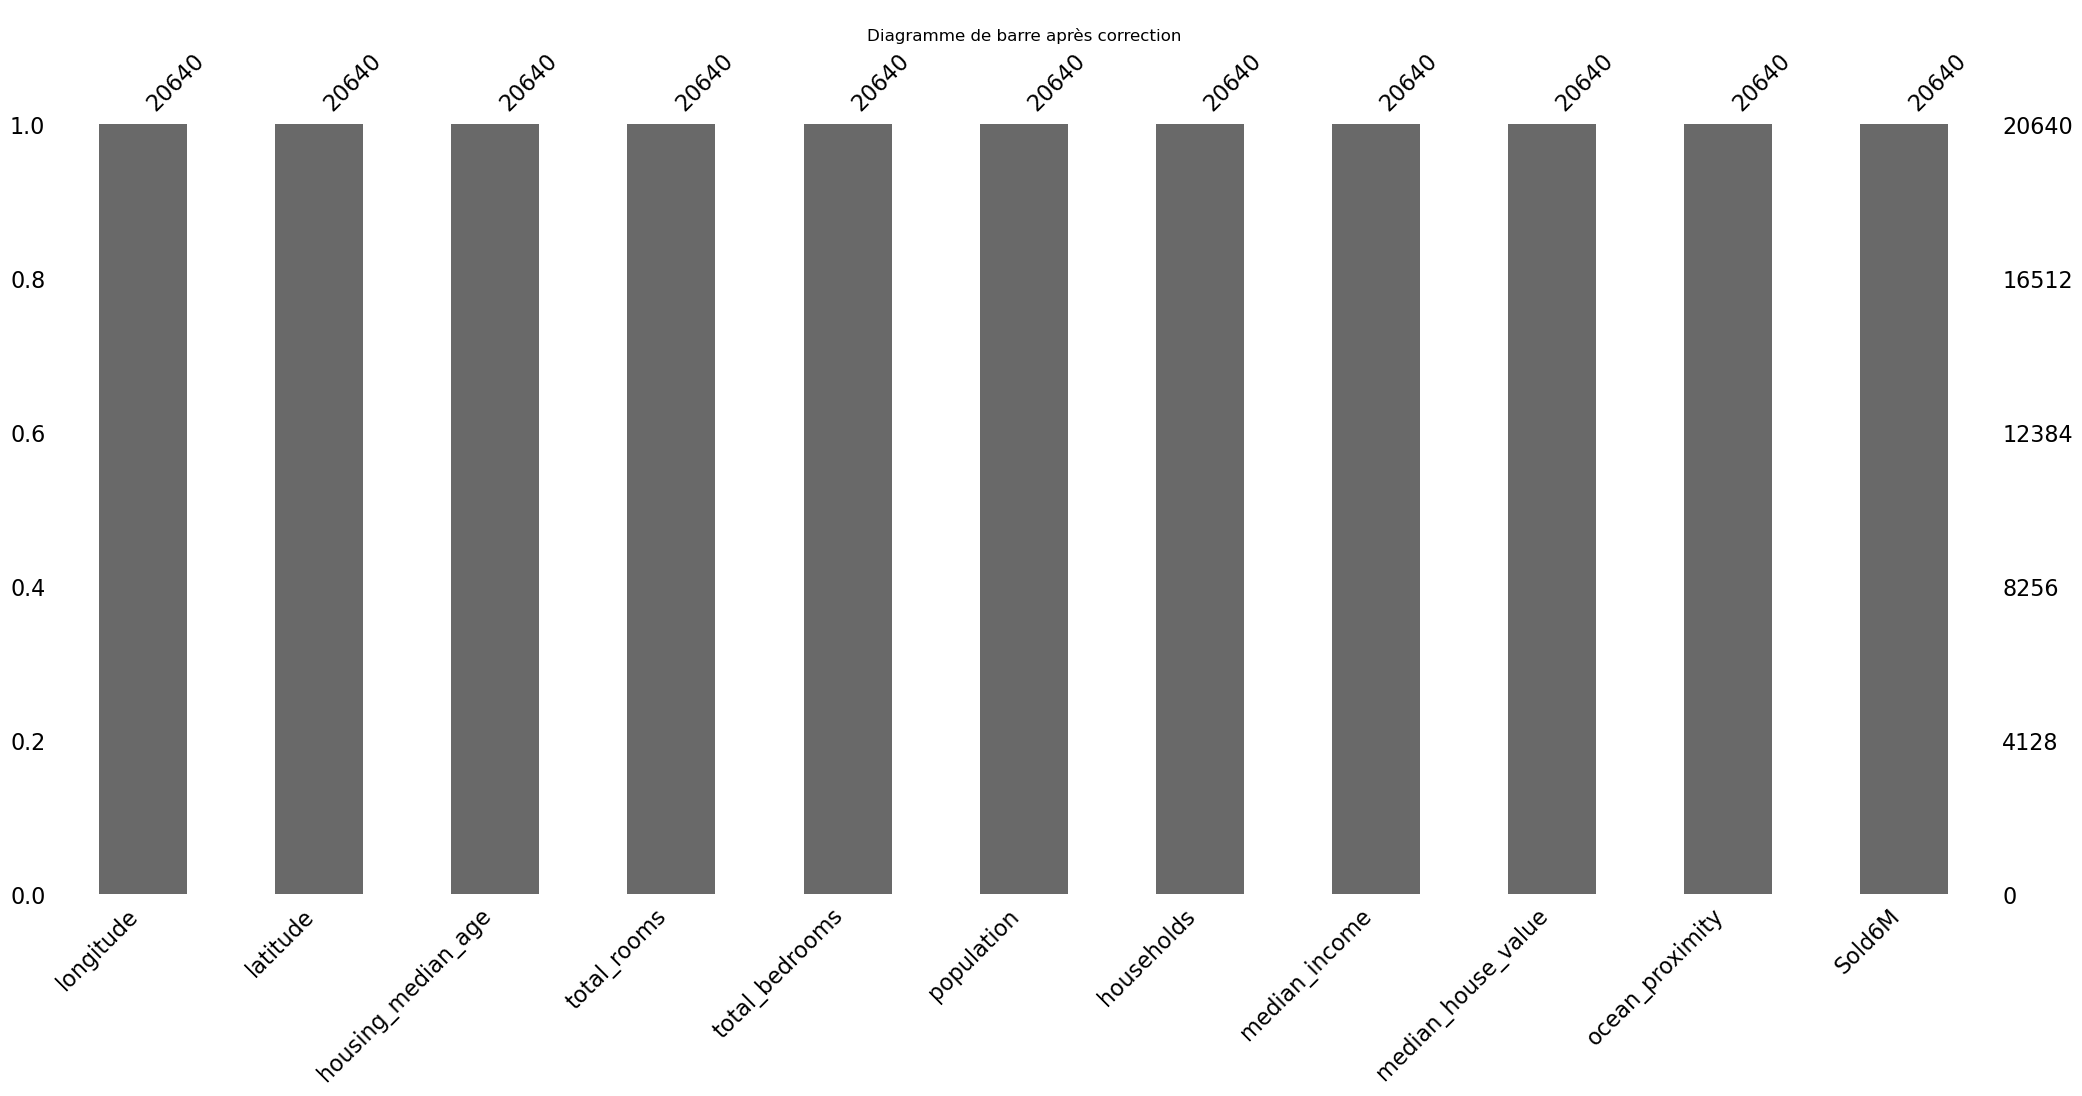


Nombre total de trous pour chaque variable dans le jeu de donnée après traitement :
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
Sold6M                0
dtype: int64


In [127]:
print("Traitement des données manquantes...")

# Sélection des valeurs numériques seulement
numerical_columns = original_data.select_dtypes(include=['float64', 'int64']).columns

print("\nColonnes triés de type numérique :")
print(numerical_columns)

# Remplissage des trous par la médiane à chaque colonne
original_data[numerical_columns] = original_data[numerical_columns].fillna(original_data[numerical_columns].median())

# Visualisation de la matrice de nullité
msno.matrix(original_data)
plt.title("\nMatrice de nullité après correction")
plt.show()

# Visualisation du diagramme de barre
msno.bar(original_data)
plt.title("\nDiagramme de barre après correction")
plt.show()

# Vérifier qu'il n'y a pas de valeurs manquantes
int_missing_values = original_data.isnull().sum()

print("\nNombre total de trous pour chaque variable dans le jeu de donnée après traitement :")
print(int_missing_values)

# Encodage des données catégorielles

In [128]:
print("Variable 'ocean_proximity' du jeu de donnée d'origine :")
print(original_data["ocean_proximity"])

# Variable catégorielle
cat_var = original_data["ocean_proximity"]

# Appliquage du One-Hot Encoding
cat_var_one_hot = pd.get_dummies(
    original_data["ocean_proximity"], 
    prefix = 'ocean_proximity' # Ajoute un préfixe aux nouvelles colonnes pour la clarté
)

# Transformation des bool en binaire (0 ou 1).
# True = 1, False = 0
for col in cat_var_one_hot:
    cat_var_one_hot[col] = cat_var_one_hot[col].astype(int) # Conversion en type numérique

print("\nVariable 'ocean_proximity' après application du One-Hot encoding :")
print(cat_var_one_hot)

print("\nJeu de donnée actuel :")
print(original_data)

print("\nSuppression de l'ancienne colonne 'ocean_proximity' :")

# Suppression de l'ancienne colonne et création d'un nouveau jeu de donnée
data_without_cat = original_data.drop("ocean_proximity", axis = 1)

# Concaténer les nouvelles colonnes
data_final = pd.concat([data_without_cat, cat_var_one_hot], axis = 1)

print("\nJeu de donnée d'origine après la transformation de donnée de l'ancienne colonne 'ocean_proximity' :")
print(data_final.head())

Variable 'ocean_proximity' du jeu de donnée d'origine :
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

Variable 'ocean_proximity' après application du One-Hot encoding :
       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
20635                          0                       1   
20636                          0                       1   
20637                          0                       1   
20638                     

# Gestion des données aberrantes

### Vérification de la répartition des valeurs pour trouver les valeurs aberrantes :

In [129]:
print("Revenue médian")
print(data_final['median_income'])

### On vérifie d'abord la répartition des valeurs ###

# Définition des intervalles
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, np.inf]  # np.inf pour capturer >8
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8+']

# Création des catégories
median_income_cat = pd.cut(
    data_final['median_income'],
    bins = bins,
    labels = labels,
    include_lowest = True
)

# Comptage par intervalle
interval_counts = median_income_cat.value_counts().sort_index()

print("\nNombre d'échantillons par intervalle de median_income :")
print("-" * 40)

total_samples = 0
for interval, count in interval_counts.items():
    percentage = (count / len(median_income_cat)) * 100
    print(f"{interval}: {count:>5} échantillons ({percentage:6.2f}%)")
    total_samples += count

print("-" * 40)
print(f"\nTOTAL: {total_samples:>5} échantillons")
print(f"Vérification: {len(median_income_cat)} échantillons au total")

# Statistiques supplémentaires
print("\n=== STATISTIQUES DÉTAILLÉES ===")
print(f"Valeur minimale: {data_final['median_income'].min():.2f}")
print(f"Valeur maximale: {data_final['median_income'].max():.2f}")
print(f"Moyenne: {data_final['median_income'].mean():.2f}")
print(f"Médiane: {data_final['median_income'].median():.2f}")

# Visualisation
print("\n=== VISUALISATION TEXTUELLE ===")
max_count = interval_counts.max()
scale_factor = 50 / max_count  # Pour afficher max 50 caractères

for interval, count in interval_counts.items():
    bar_length = int(count * scale_factor)
    bar = '█' * bar_length
    percentage = (count / len(data_final)) * 100
    print(f"{interval:>4} | {bar:<50} {count:>5} ({percentage:5.1f}%)")

# Vérifier les valeurs > 8
if '8+' in interval_counts.index:
    print(f"\nPour les valeurs >8 ({interval_counts['8+']} échantillons):")
    values_above_8 = data_final[data_final['median_income'] > 8]['median_income']
    if len(values_above_8) > 0:
        print(f"  Min: {values_above_8.min():.2f}")
        print(f"  Max: {values_above_8.max():.2f}")
        print(f"  Moyenne: {values_above_8.mean():.2f}")
        
        # Détail des valeurs > 8
        print("  Distribution détaillée (>8):")
        extended_bins = [8, 9, 10, 11, 12, 13, 14, 15, np.inf]
        extended_labels = ['8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15+']
        
        above_8_intervals = pd.cut(values_above_8, bins=extended_bins, labels=extended_labels)
        for label in extended_labels:
            count = (above_8_intervals == label).sum()
            if count > 0:
                print(f"    {label}: {count} échantillons")

Revenue médian
0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

Nombre d'échantillons par intervalle de median_income :
----------------------------------------
0-1:   159 échantillons (  0.77%)
1-2:  2298 échantillons ( 11.13%)
2-3:  4946 échantillons ( 23.96%)
3-4:  5150 échantillons ( 24.95%)
4-5:  3598 échantillons ( 17.43%)
5-6:  2127 échantillons ( 10.31%)
6-7:  1163 échantillons (  5.63%)
7-8:   509 échantillons (  2.47%)
8+:   690 échantillons (  3.34%)
----------------------------------------

TOTAL: 20640 échantillons
Vérification: 20640 échantillons au total

=== STATISTIQUES DÉTAILLÉES ===
Valeur minimale: 0.50
Valeur maximale: 15.00
Moyenne: 3.87
Médiane: 3.53

=== VISUALISATION TEXTUELLE ===
 0-1 | █                                                    159 (  0.8%)
 1-2 | ██████████████████████    

### Ajustement des valeurs aberrantes :

In [130]:
# Nouvelle colonne 'median_income_adjusted'
# Mise à l'échelle (/1.5) et arrondissement des valeurs (np.ceil)
# Permet d'avoir des valeurs simple pour l'apprentissage
data_final["median_income_adjusted"] = np.ceil(data_final["median_income"]/1.5)

print("\nNouvelle colonne [median_income_adjusted] crée :")
print(data_final['median_income_adjusted'])

# On remplace toutes les entrées qui sont plus grand que 7 par la valeur 7 pour éviter les valeurs aberrantes.
# Cette décision se fait car seulement environ 5% des données sont supérieur à 7 ce qui est négligeable.
# Ainsi, on généralise toutes les valeurs sans supprimer les valeurs abérrantes !
# Cela permet de faciliter l'apprentissage de ML.
# (inplace = true) permet de mettre à jour la colonne 'income_cat' sans en créer une copie.
data_final["median_income_adjusted"].where(data_final["median_income_adjusted"] < 7, 7.0, inplace = True)

print("\nAprès remplacement des valeurs aberrantes (> 7) par 7 :")
print(data_final)


Nouvelle colonne [median_income_adjusted] crée :
0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: median_income_adjusted, Length: 20640, dtype: float64

Après remplacement des valeurs aberrantes (> 7) par 7 :
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.

C:\Users\micka\AppData\Local\Temp\ipykernel_16204\2020487799.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_final["median_income_adjusted"].where(data_final["median_income_adjusted"] < 7, 7.0, inplace = True)


# Analyse des valeurs pertinentes

### Création de nouvelles valeurs (feature engieneering) :

In [131]:
print("\nCréation des nouvelles variables...")

# Moyenne de pièces par foyer
data_final['rooms_per_household'] = data_final['total_rooms'] / data_final['households']

# Pourcentage de chambre pour chaque quartier
data_final['bedrooms_per_quarter'] = data_final['total_bedrooms'] / data_final['total_rooms']

# Moyenne de personnes par foyer
data_final['population_per_household'] = data_final['population'] / data_final['households']

# Variable polynomiale pour s'adapter à des relations non-linéaires
data_final['median_income_squared'] = data_final['median_income'] ** 2

# Variable géographique combinée
data_final['lat_long_interaction'] = data_final['latitude'] * data_final['longitude']

# Quartier vieux ou pas (catégorielle)
# Renvoie True ou False si > 29
# 'astype' convertit en donnée numérique (1 ou 0)
# 1 = vieux, 0 = pas vieux
data_final['is_old_house'] = (data_final['housing_median_age'] > 29).astype(int)

print("Nouvelles variables créées avec succès!")
print(f"Nouvelles dimensions: {data_final.shape}")
print("\nNouveau jeu de donnée :")
print(data_final)

new_vars = ['rooms_per_household', 'bedrooms_per_quarter', 'population_per_household', 
            'median_income_squared', 'lat_long_interaction', 'is_old_house']

print("\nStatistique principal des nouvelles variables :")
print(data_final[new_vars].describe())


Création des nouvelles variables...
Nouvelles variables créées avec succès!
Nouvelles dimensions: (20640, 22)

Nouveau jeu de donnée :
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.

### Corrélation des valeurs :

Création de la <b>matrice de corrélation</b> :

In [132]:
# Calcul de la matrice de corrélation
correlation_matrix = data_final.corr() 

print("Coefficient de correlation :")
print(correlation_matrix)

Coefficient de correlation :
                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.044568 -0.036100           -0.361262   
total_bedrooms               0.069120 -0.066484           -0.319026   
population                   0.099773 -0.108785           -0.296244   
households                   0.055310 -0.071035           -0.302916   
median_income               -0.015176 -0.079809           -0.119034   
median_house_value          -0.045967 -0.144160            0.105623   
Sold6M                      -0.067474  0.063741            0.318062   
ocean_proximity_<1H OCEAN    0.321121 -0.446969            0.045300   
ocean_proximity_INLAND      -0.055575  0.351166           -0.236645   
ocean_proximity_ISLAND       0.009446 -0.016572 

Affichage de la <b>carte de chaleur</b> des corrélations :

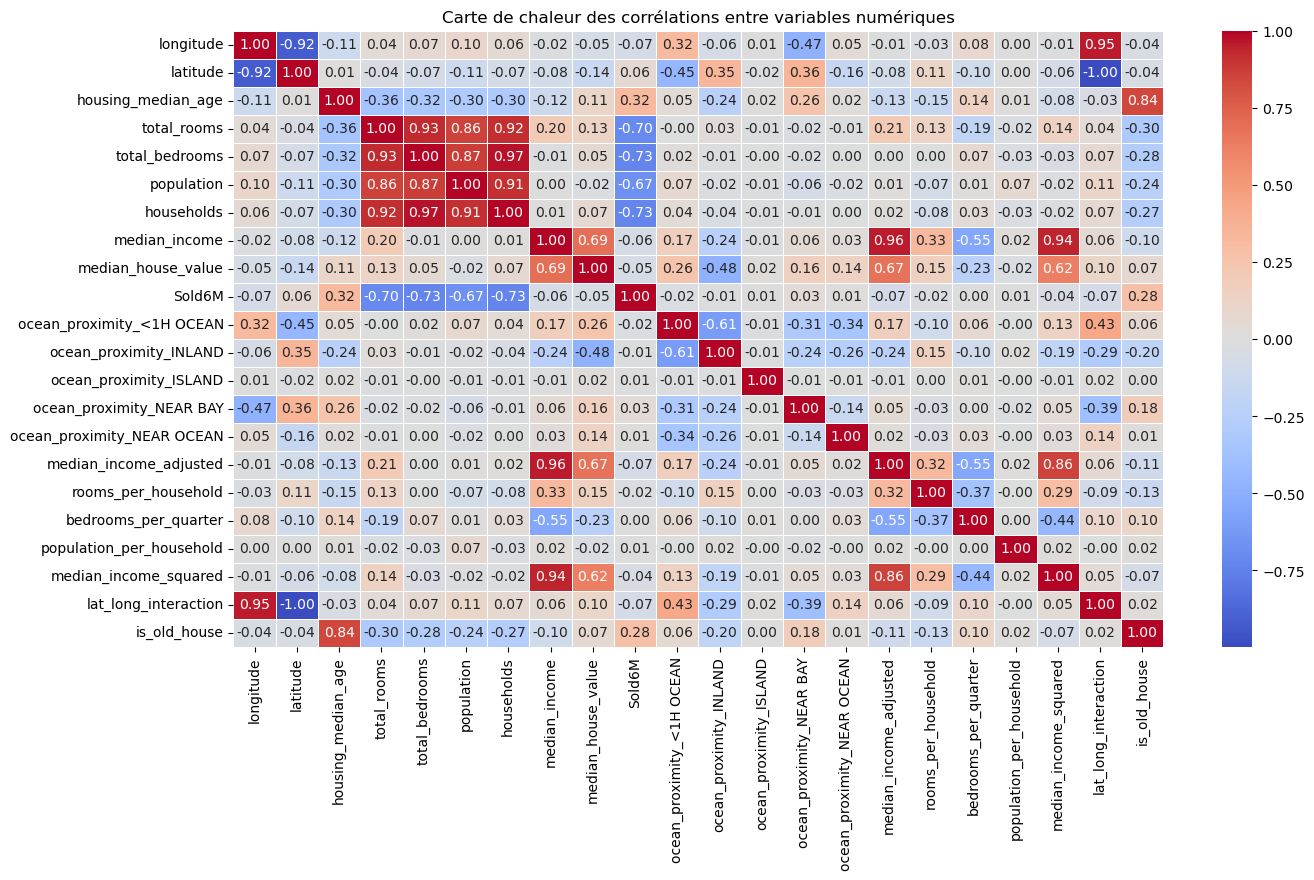

In [133]:
plt.figure(figsize = (15, 8))

sns.heatmap(
    correlation_matrix,  # Données affiché
    annot = True,        # Affiche la valeur de corrélation sur la carte
    fmt = ".2f",         # Formatage à 2 décimales
    cmap = 'coolwarm',   # Palette de couleurs pour visualiser la force
    linewidths = .7,     # Ajoute une ligne de séparation entre les cellules
    cbar = True          # Affiche la barre de couleur
)

plt.title("Carte de chaleur des corrélations entre variables numériques")
plt.show()

### Choix des valeurs pertinentes :

In [134]:
print("Variables du jeu de donnée original :")
print(data_final.columns)

# Variables sélectionner
selected_var = [
    'lat_long_interaction',
    'housing_median_age',
    'households',
    'median_income',
    'Sold6M',
    'ocean_proximity_<1H OCEAN',
    'ocean_proximity_INLAND',
    'ocean_proximity_ISLAND',
    'ocean_proximity_NEAR BAY',
    'ocean_proximity_NEAR OCEAN'
]

print(f"\nNombre de variables pertinentes sélectionnées: {len(selected_var)}")

# Création du jeu de donnée avec variables sélectionner
data_selected = data_final[selected_var].copy()

print("\nJeu de donnée avec variables sélectionner uniquement :")
print(data_selected.head())

Variables du jeu de donnée original :
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'Sold6M', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'median_income_adjusted', 'rooms_per_household', 'bedrooms_per_quarter',
       'population_per_household', 'median_income_squared',
       'lat_long_interaction', 'is_old_house'],
      dtype='object')

Nombre de variables pertinentes sélectionnées: 10

Jeu de donnée avec variables sélectionner uniquement :
   lat_long_interaction  housing_median_age  households  median_income  \
0            -4630.0724                41.0       126.0         8.3252   
1            -4627.2492                21.0      1138.0         8.3014   
2            -4626.7840                52.0       177.0         7.2574   
3            -4627

# Diviser les données en deux ensemble (Apprentissage et Test) 

### Préparation de l'ensembles d'entraînement et de validation :

In [135]:
# La variable suivante permet de mélanger les données de manière aléatoire avant d'être divisé.
# On choisit de diviser qu'une seule fois le jeu de donnée. Soit 2 sous-ensembles.
# Pour la division : 20% des données pour le test, 80% pour l'entraînement.
# Tout ces paramètres 'n_splits', 'test_size' et 'random_state' sont ce qu'on appelle des 'hyperparamètres'.
# La stratification est incluse pour cette fonction.
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

# On créer 1 ensemble d'entraînement et 1 ensemble de validation grâce à la stratification.
# .loc permet d'aller sélectionner en fonction du paramètre (en fonction de l'indice dans notre cas).
for train_index, valid_index in split.split(data_selected, data_selected["Sold6M"]):
    strat_train_set = data_selected.loc[train_index]
    strat_valid_set = data_selected.loc[valid_index]

print("\nEnsemble d'entraînement :")
print(strat_train_set.head())

print("\nEnsemble de validation :")
print(strat_valid_set.head())

# Pour vérifier la répartition équitable des données
print("\nDistribution des catégories de la variable Sold6M dans l'entraînement :")
print(strat_train_set["Sold6M"].value_counts(normalize = True))

print("\nDistribution des catégories de la variable Sold6M dans la validation :")
print(strat_valid_set["Sold6M"].value_counts(normalize = True))


Ensemble d'entraînement :
       lat_long_interaction  housing_median_age  households  median_income  \
18061            -4544.8725                31.0       191.0        10.2311   
3567             -4059.3357                14.0      1128.0         3.4091   
11694            -3998.3422                18.0       435.0         7.1425   
20033            -4293.0514                29.0       571.0         1.5911   
10303            -3990.7252                17.0      1316.0         6.0829   

       Sold6M  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
18061       1                          1                       0   
3567        0                          1                       0   
11694       1                          1                       0   
20033       1                          0                       1   
10303       0                          1                       0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
18061                       0       

# Définition de la variable cible et des variable indépendantes

### Séparer la variable cible et les variables indépendantes :

Ensemble d'entraînement :

In [136]:
# Variable Cible (y) : Si la maison a été acheter
datas_train_y = strat_train_set["Sold6M"].copy()

print("Variable cible 'y' pour l'ensemble d'entraînement :")
print(datas_train_y.head())

# Caractéristiques (X) : Toutes les autres colonnes
datas_train_x = strat_train_set.drop("Sold6M", axis = 1).copy()

print("\nVariable indépendante 'x' pour l'ensemble d'entraînement :")
print(datas_train_x.head())

Variable cible 'y' pour l'ensemble d'entraînement :
18061    1
3567     0
11694    1
20033    1
10303    0
Name: Sold6M, dtype: int64

Variable indépendante 'x' pour l'ensemble d'entraînement :
       lat_long_interaction  housing_median_age  households  median_income  \
18061            -4544.8725                31.0       191.0        10.2311   
3567             -4059.3357                14.0      1128.0         3.4091   
11694            -3998.3422                18.0       435.0         7.1425   
20033            -4293.0514                29.0       571.0         1.5911   
10303            -3990.7252                17.0      1316.0         6.0829   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
18061                          1                       0   
3567                           1                       0   
11694                          1                       0   
20033                          0                       1   
10303                          1     

Ensemble de validation :

In [137]:
# Variable Cible (y) : Si la maison a été acheter
datas_valid_y = strat_valid_set["Sold6M"].copy()

print("\nVariable cible 'y' pour l'ensemble de validation :")
print(datas_valid_y.head())

# Caractéristiques (X) : Toutes les autres colonnes
datas_valid_x = strat_valid_set.drop("Sold6M", axis = 1).copy()

print("\nVariable indépendante 'x' pour l'ensemble de validation :")
print(datas_valid_x.head())


Variable cible 'y' pour l'ensemble de validation :
7152     1
3865     1
19190    1
20331    0
4552     1
Name: Sold6M, dtype: int64

Variable indépendante 'x' pour l'ensemble de validation :
       lat_long_interaction  housing_median_age  households  median_income  \
7152             -4020.9848                41.0       272.0         3.1724   
3865             -4047.4365                33.0       658.0         4.3333   
19190            -4715.8192                29.0       562.0         2.9107   
20331            -4075.9296                20.0      1188.0         5.9316   
4552             -4024.8896                52.0        92.0         1.0769   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
7152                           1                       0   
3865                           1                       0   
19190                          1                       0   
20331                          1                       0   
4552                           1      

# Arbres de Décision

Les arbres de décision sont des <b>modèles de prédiction</b> qui utilisent une structure d'arbre pour prendre des décisions basées sur des règles dérivées des caractéristiques des données. 

Ils sont largement utilisés pour les tâches de <b>classification</b> et de <b>régression</b> en raison de leur simplicité et de leur interprétabilité.

### Principe de Fonctionnement

Un arbre de décision est constitué de <b>nœuds de décision</b> et de <b>feuilles</b>. 

Chaque nœud de décision représente une caractéristique des données, et chaque branche de ce nœud représente une valeur ou un intervalle de cette caractéristique.

Les feuilles de l'arbre représentent les classes de sortie ou les valeurs de régression.

Le modèle divise de manière récursive les données en sous-ensembles basés sur les valeurs des caractéristiques, créant ainsi une structure en forme d'arbre. 

Le processus continue jusqu'à ce que tous les nœuds soient <b>purs</b> (c'est-à-dire qu'ils contiennent des instances d'une seule classe) ou qu'une condition d'arrêt soit atteinte.

<center><img src="images/decision_tree_composition.png" width="850"></center>

### Construction de l'Arbre

1. **Sélection de la Caractéristique** : À chaque nœud, le modèle sélectionne la caractéristique qui divise le mieux les données. Cela est généralement basé sur des critères comme la réduction de l'entropie ou la réduction de l'indice de Gini.
2. **Création de Nœuds** : Les données sont divisées en sous-ensembles basés sur la caractéristique sélectionnée, et des nœuds enfants sont créés pour chaque division.
3. **Répartition des Données** : Les sous-ensembles de données sont répartis entre les nœuds enfants, et le processus de sélection de la caractéristique se répète.
4. **Arrêt de la Division** : La division s'arrête lorsque tous les nœuds sont purs ou lorsqu'une condition d'arrêt prédéfinie est atteinte, comme une profondeur maximale de l'arbre ou un nombre minimal d'instances par nœud.

#### Critères de Sélection

- **Entropie et Gain d'Information** : L'entropie mesure le désordre dans les données. Le gain d'information est la réduction de l'entropie après la division des données.
- **Indice de Gini** : Mesure de l'impureté des données. Une valeur de 0 indique une pureté maximale, tandis qu'une valeur de 1 indique une impureté maximale.

#### Avantages et Inconvénients

##### Avantages :
- **Interprétabilité** : Les arbres de décision sont faciles à visualiser et à interpréter.
- **Pas de Prétraitement des Données** : Peuvent gérer des données numériques et catégoriques sans nécessiter de prétraitement.
- **Manipulation des Données Manquantes** : Peut gérer des valeurs manquantes en utilisant des mécanismes comme la pondération des chemins de décision.
- **Robustesse** : Peuvent capturer des interactions non linéaires entre les caractéristiques.

##### Inconvénients :
- **Surapprentissage** : Les arbres de décision peuvent facilement surapprendre les données d'entraînement, surtout lorsqu'ils sont profonds.
- **Variance Élevée** : Sensibles aux variations dans les données d'entraînement. Des changements mineurs peuvent entraîner des arbres complètement différents.
- **Biais** : Tendent à privilégier les caractéristiques avec de nombreuses valeurs distinctes.

#### Applications

- **Classification** : Attribution de classes à des instances basées sur leurs caractéristiques.
- **Régression** : Prédiction de valeurs continues.
- **Analyse Exploratoire** : Identification des caractéristiques importantes et des relations entre les caractéristiques et les classes de sortie.

Les arbres de décision sont un outil puissant pour la modélisation prédictive, offrant une combinaison de simplicité, d'interprétabilité et de flexibilité.

# Standardisation

Un algorithme <b>d'arbre de décision</b> n'étant pas sensibles aux valeurs aberrantes, l'algorithme de <b>Random Forest</b> est pareille sur ce point.

On a donc pas besoins de standardiser les valeurs (mise à l'échelle).

# Random Forest

Les forêts aléatoires sont une méthode d'ensemble puissante et flexible utilisée pour les tâches de <b>classification</b> et de <b>régression</b>. 

### Fonctionnement

Elles combinent plusieurs <b>arbres de décision</b> pour améliorer les performances prédictives et réduire les risques de surapprentissage.

1. **Échantillonnage Bootstrap** : Pour chaque arbre de la forêt, un échantillon aléatoire avec remplacement (bootstrap) des données d'entraînement est créé. Cela signifie que certains exemples peuvent être sélectionnés plusieurs fois, tandis que d'autres peuvent ne pas être sélectionnés du tout.

2. **Sélection de Sous-ensembles de Caractéristiques** : À chaque nœud de chaque arbre, un sous-ensemble aléatoire des caractéristiques est sélectionné. L'arbre choisit la meilleure division parmi ce sous-ensemble de caractéristiques.

3. **Construction des Arbres** : Les arbres de décision sont construits jusqu'à leur complétion sans élagage. Cela permet à chaque arbre de capturer des modèles complexes dans les données.

4. **Agrégation des Prédictions** : Pour la classification, chaque arbre vote pour une classe. La classe avec le plus de votes est choisie comme prédiction finale (majority voting). Pour la régression, la moyenne des prédictions de tous les arbres est utilisée.

<center><img src="images/random_forest_composition.png" width="850"></center>

### Hyperparamètre :

Un hyperparamètre est un paramètre de configuration d'un algorithme de machine learning qui n'est pas appris pendant l'entraînement, mais qui est défini avant l'entraînement.

Une bonne configuration permet :
- D'éviter le sur-apprentissage (overfitting)
- D'améliorer les performances
- De réduire le temps d'entraînement
- De gérer le compromis biais-variance

Voici les hyperparamètres que nous avons configurer :
- **n_estimators** : nombre d'arbre qu'il faut créer. Plus il y a d'arbre, moins il y a de bruits.
- **max_depth** : profondeur maximale d'un arbre. Une petite profondeur peut mener à un sous-apprentissage tandis qu'une grande profondeur peut mener à un sur-apprentissage.
- **min_samples_split** : échantillon minimal à diviser. Beaucoup de division peut mener à un sur-apprentissage tandis que peu de division peut mener à un sous-apprentissage.
- **min_samples_leaf** : échantillon minimum par feuille. S'il y a peu d'échantillons, il risque d'y avoir une variance élevée tandis que le contraire peut mener à un biais accru.

### Entraînement du modèle :

In [138]:
# Création du modèle avec des hyperparamètres de base
rf_standard_model = RandomForestClassifier(
    n_estimators = 100,      # Nombre d'arbres dans la forêt
    random_state = 42,       # Pour la reproductibilité
    n_jobs = -1              # Utiliser tous les cœurs CPU
)

# Création du modèle avec des hyperparamètres personalisés
rf_opti_model = RandomForestClassifier(
    n_estimators = 100,      # Nombre d'arbres dans la forêt
    random_state = 42,       # Pour la reproductibilité
    max_depth = 10,          # Profondeur maximale
    min_samples_split = 30,  # Quantité de donnée minimal requis pour diviser le noeud
    min_samples_leaf = 20,   # Quantité de donnée minimal requis dans une feuille
    n_jobs = -1              # Utiliser tous les cœurs CPU
)

# Entraînement du modèle sur les données d'entraînement
# 'fit' = apprendre
rf_standard_model.fit(datas_train_x, datas_train_y)
rf_opti_model.fit(datas_train_x, datas_train_y)

print(f"Nombre d'arbres créés : {rf_standard_model.n_estimators}")
print(f"\nNombre d'arbres créés (modèle optimisé) : {rf_opti_model.n_estimators}")
print(f"\nNombre de variables utilisées : {datas_train_x.shape[1]}")

Nombre d'arbres créés : 100

Nombre d'arbres créés (modèle optimisé) : 100

Nombre de variables utilisées : 9


### Prédiction :

Modèle de base :

In [139]:
# Prédictions sur l'ensemble d'entraînement
train_standard_predict = rf_standard_model.predict(datas_train_x)

# Affichage des 10 premières prédictions et valeurs réelles
print("Prédictions sur l'ensemble d'entraînement :")
print(train_standard_predict[:30])

print("\nValeurs réelles correspondantes de l'ensemble d'entraînement :")
print(datas_train_y.values[:30])

# Prédictions sur l'ensemble de validation
valid_standard_predict = rf_standard_model.predict(datas_valid_x)

# Affichage des 10 premières prédictions et valeurs réelles
print("\nPrédictions sur l'ensemble de validation :")
print(valid_standard_predict[:30])

print("\nValeurs réelles correspondantes de l'ensemble de validation :")
print(datas_valid_y.values[:30])

Prédictions sur l'ensemble d'entraînement :
[1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1]

Valeurs réelles correspondantes de l'ensemble d'entraînement :
[1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1]

Prédictions sur l'ensemble de validation :
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]

Valeurs réelles correspondantes de l'ensemble de validation :
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


Modèle optimisé :

In [140]:
# Prédictions sur l'ensemble d'entraînement (modèle optimisé)
train_opti_predict = rf_opti_model.predict(datas_train_x)

# Affichage des 10 premières prédictions et valeurs réelles (modèle optimisé)
print("Prédictions sur l'ensemble d'entraînement (modèle optimisé) :")
print(train_opti_predict[:30])

print("\nValeurs réelles correspondantes de l'ensemble d'entraînement (modèle optimisé) :")
print(datas_train_y.values[:30])

# Prédictions sur l'ensemble de validation (modèle optimisé)
valid_opti_predict = rf_opti_model.predict(datas_valid_x)

# Affichage des 10 premières prédictions et valeurs réelles (modèle optimisé)
print("\nPrédictions sur l'ensemble de validation (modèle optimisé) :")
print(valid_opti_predict[:30])

print("\nValeurs réelles correspondantes de l'ensemble de validation (modèle optimisé) :")
print(datas_valid_y.values[:30])

Prédictions sur l'ensemble d'entraînement (modèle optimisé) :
[1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1]

Valeurs réelles correspondantes de l'ensemble d'entraînement (modèle optimisé) :
[1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1]

Prédictions sur l'ensemble de validation (modèle optimisé) :
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Valeurs réelles correspondantes de l'ensemble de validation (modèle optimisé) :
[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


### Métrique :

Une métrique est une <b>mesure quantitative</b> utilisée pour évaluer la performance, la qualité, ou la distance d'un modèle ou d'un processus.

La métrique mesure à quel point un <b>modèle est bon</b>.

Il existe différentes métriques que nous utilisons ici.

**Précision** :

C'est le pourcentage de bonne réponse par rapport aux prédictions positives donner par le modèle.

La formule mathématique :

$Précision = \dfrac{Vrais Positifs}{Vrais Positifs + Faux Positifs}$

- Vrais Positifs : Le modèle a prédit 1, et l'étiquette vraie est 1. (Prédictions positives correctes)
- Faux Positifs : Le modèle a prédit 1, mais l'étiquette vraie est 0. (Fausses alarmes)

Une haute Précision (proche de 1.0 ou 100%) signifie que lorsque un modèle dit "C'est positif", il a très probablement raison.

**Rappel** : 

C'est le pourcentage d’avoir réussis à trouver toutes les bonnes réponses qui existent dans un jeu de donnée.

La formule mathématique :

$Rappel = \dfrac{Vrais Positifs}{Vrais Positifs + Faux Negatifs}$

Un haut Rappel (proche de 1.0 ou 100%) signifie que le modèle a réussis à trouver la grande majorité des cas positifs réels. 

**Matrice de confusion** :

La Matrice de Confusion est un tableau qui résume les résultats d'un modèle de classification en comparant les classes prédites aux classes réelles (ou vraies) dans l'ensemble de données de test.

<center><img src="images/confusion_matrix.png" width="500"></center>

**Score F1** :

Le Score F1 est la moyenne harmonique de la Précision et du Rappel.

Il est particulièrement utile lorsque il y a des classes déséquilibrées et qu'on cherche à avoir un modèle qui présente à la fois une bonne Précision et un bon Rappel.

Le Score F1 pénalise sévèrement les modèles où la Précision et le Rappel sont très différents.

Formule mathématique :

$Score F1 = 2 * \dfrac{Précision * Rappel}{Précision + Rappel}$

Par exemple si la Précision est très haute (1.0) mais le Rappel est très bas (0.1)

La moyenne harmonique, elle, donnera un résultat beaucoup plus proche de la valeur minimale (0.18 dans cet exemple), reflétant que le modèle est médiocre globalement.

Le Score F1 n'est donc élevé que si la précision et le Rappel sont tous les 2 élevés.

**ROC (Receiver Operating Characteristic)** :

La Courbe ROC est une représentation graphique qui illustre la capacité d'un modèle de classification à distinguer entre deux classes (Positive/Négative) pour tous les seuils de décision possibles comparer à la précision et au rappel qui eux n'évalue à un seuil fixe seulement.

Elle se construit de la manière suivante :
- Axe X : représente le Taux de Faux Positifs (FPR)
- Axe Y : représente le Taux de Vrais Positifs (TPR)

Interprétation :
- La diagonale (ligne du hasard) : représente les performances d'un modèle aléatoire. Un modèle utile doit être au-dessus de cette ligne.
- Plus la courbe se dirige vers le coin supérieur gauche, meilleur est le modèle. Cela signifie qu'il atteint un TPR élevé pour un FPR faible.

**AUC** :

L'AUC est la mesure numérique qui résume la performance globale de la courbe ROC. 

C'est simplement l'aire sous la courbe ROC.

Elle évalue la performance du modèle sur tous les seuils possibles.

Valeurs et interprétation :
- AUC = 1.0 : Modèle parfait. Il sépare parfaitement les deux classes. C'est souvent signe de sur-apprentissage.
- 0.5 < AUC < 1.0 : Modèle utile. Plus la valeur est proche de 1, meilleur il est.
- AUC = 0.5 : Modèle aussi performant qu'une prédiction aléatoire (courbe sur la diagonale).
- AUC < 0.5 : Le modèle fait pire que le hasard.

En gros, plus l'AUC est proche de 1, plus 

**PR** :

Ensemble d'entraînement (modèle de base) :

--- Métrique de l'ensemble d'entrainement ---

Matrice de Confusion Random Forest :
 [[ 1922     0]
 [    0 14590]]

Rapport de Classification Random Forest :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1922
           1       1.00      1.00      1.00     14590

    accuracy                           1.00     16512
   macro avg       1.00      1.00      1.00     16512
weighted avg       1.00      1.00      1.00     16512


AUC-ROC Random Forest :
1.0

Aire sous la courbe ROC :
1.0


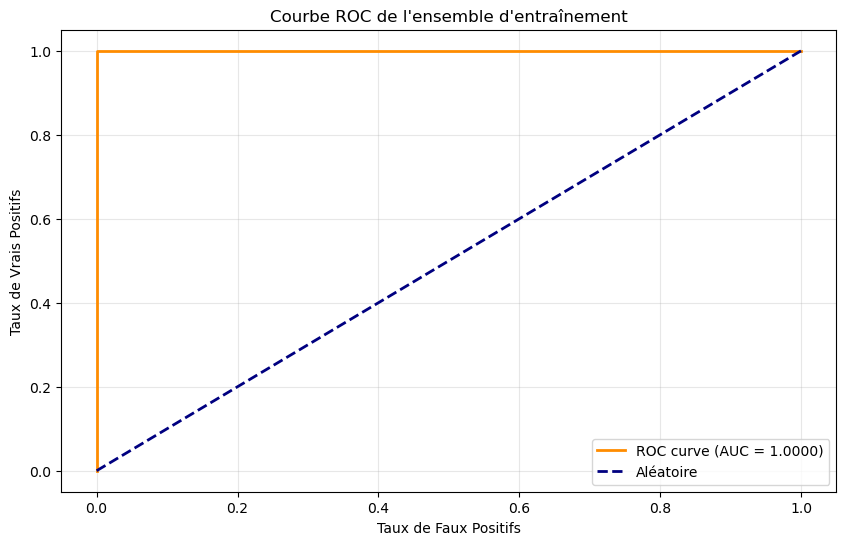

Aire sous la courbe PR :
1.0


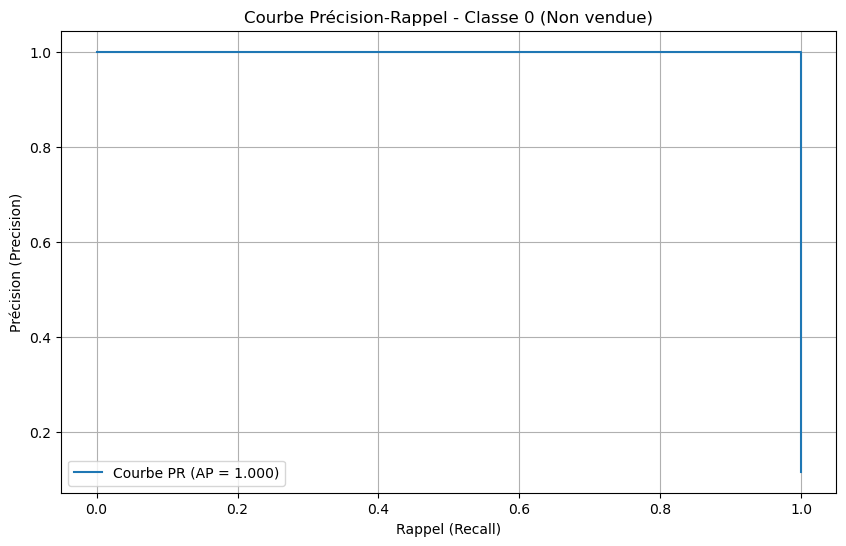

In [141]:
print("--- Métrique de l'ensemble d'entrainement ---")

# Matrice de confusion
conf_matrix_train_standard_rf = confusion_matrix(datas_train_y, train_standard_predict)

print("\nMatrice de Confusion Random Forest :\n", conf_matrix_train_standard_rf)

# Rapport de classification
class_report_train_standard_rf = classification_report(datas_train_y, train_standard_predict)

print("\nRapport de Classification Random Forest :\n", class_report_train_standard_rf)

# AUC-ROC
train_proba_standard = rf_standard_model.predict_proba(datas_train_x)[:, 1]  # Classe 1
roc_auc_train_standard_rf = roc_auc_score(datas_train_y, train_proba_standard)

print("\nAUC-ROC Random Forest :")
print(roc_auc_train_standard_rf) # 1.0

# Courbe ROC
y_proba_train_standard_rf = rf_standard_model.predict_proba(datas_train_x)[:, 1]
false_positiv_percentage_rf, true_positiv_percentage_rf, thresholds_rf = roc_curve(datas_train_y, y_proba_train_standard_rf)

# Aire sous la courbe ROC
under_curve_train_standard_auc = auc(false_positiv_percentage_rf, true_positiv_percentage_rf)

print("\nAire sous la courbe ROC :")
print(under_curve_train_standard_auc)

# Affichage de la courbe ROC
plt.figure(figsize = (10, 6))

plt.plot(
    false_positiv_percentage_rf, true_positiv_percentage_rf,
    color = 'darkorange',
    lw = 2,
    label = f'ROC curve (AUC = {under_curve_train_standard_auc:.4f})'
)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Aléatoire')
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC de l'ensemble d'entraînement")
plt.legend(loc = "lower right")
plt.grid(True, alpha = 0.3)
plt.show()

# Pour la classe 0 (minoritaire)
y_proba_0 = rf_standard_model.predict_proba(datas_train_x)[:, 0]  # Probabilités pour la classe 0
precision, recall, thresholds = precision_recall_curve(datas_train_y, y_proba_0, pos_label = 0)

# Aire sous la courbe PR
ap_score = average_precision_score(datas_train_y, y_proba_0, pos_label = 0)

print("Aire sous la courbe PR :")
print(ap_score)

# Affichage de la courbe 
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label = f'Courbe PR (AP = {ap_score:.3f})')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Précision-Rappel - Classe 0 (Non vendue)')
plt.legend()
plt.grid(True)
plt.show()

Ensemble de validation (modèle de base) :

--- Métrique de l'ensemble de validation ---

Matrice de Confusion Random Forest :
 [[ 435   45]
 [  21 3627]]

Rapport de Classification Random Forest :
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       480
           1       0.99      0.99      0.99      3648

    accuracy                           0.98      4128
   macro avg       0.97      0.95      0.96      4128
weighted avg       0.98      0.98      0.98      4128


AUC-ROC (Random Forest) :
0.9930841100146198

Aire sous la courbe ROC :
0.9930841100146198


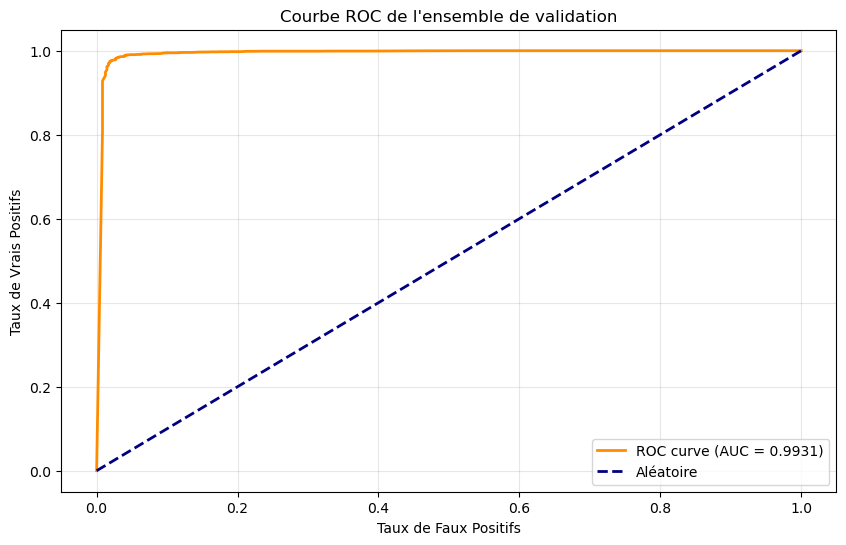

Aire sous la courbe PR :
0.9772176865636752


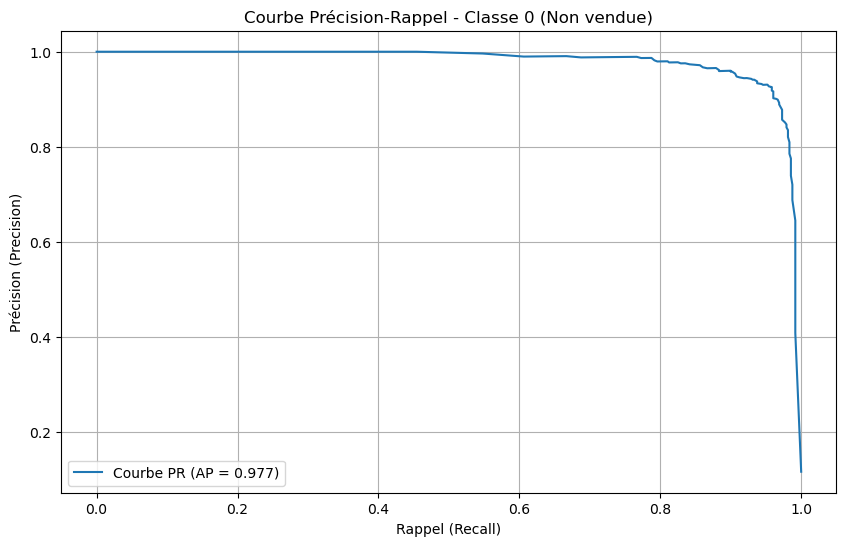

In [142]:
print("--- Métrique de l'ensemble de validation ---")

# Matrice de confusion
conf_matrix_valid_standard_rf = confusion_matrix(datas_valid_y, valid_standard_predict)

print("\nMatrice de Confusion Random Forest :\n", conf_matrix_valid_standard_rf)

# Rapport de classification
class_report_valid_standard_rf = classification_report(datas_valid_y, valid_standard_predict)

print("\nRapport de Classification Random Forest :\n", class_report_valid_standard_rf)

# AUC-ROC
valid_proba_standard = rf_standard_model.predict_proba(datas_valid_x)[:, 1]  # Classe 1
roc_auc_valid_standard_rf = roc_auc_score(datas_valid_y, valid_proba_standard)

print("\nAUC-ROC (Random Forest) :")
print(roc_auc_valid_standard_rf) # 0.95024

# Courbe ROC
y_proba_rf = rf_standard_model.predict_proba(datas_valid_x)[:, 1]
false_positiv_percentage_rf, true_positiv_percentage_rf, thresholds_rf = roc_curve(datas_valid_y, y_proba_rf)

# Aire sous la courbe ROC
under_curve_valid_standard_auc = auc(false_positiv_percentage_rf, true_positiv_percentage_rf)

print("\nAire sous la courbe ROC :")
print(under_curve_valid_standard_auc)

# Affichage de la courbe
plt.figure(figsize = (10, 6))

plt.plot(
    false_positiv_percentage_rf, true_positiv_percentage_rf,
    color = 'darkorange',
    lw = 2,
    label = f'ROC curve (AUC = {under_curve_valid_standard_auc:.4f})'
)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Aléatoire')
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC de l'ensemble de validation")
plt.legend(loc = "lower right")
plt.grid(True, alpha = 0.3)
plt.show()

# Pour la classe 0 (minoritaire)
y_proba_0 = rf_standard_model.predict_proba(datas_valid_x)[:, 0]  # Probabilités pour la classe 0
precision, recall, thresholds = precision_recall_curve(datas_valid_y, y_proba_0, pos_label = 0)

# Aire sous la courbe PR
ap_score = average_precision_score(datas_valid_y, y_proba_0, pos_label = 0)

print("Aire sous la courbe PR :")
print(ap_score)

# Affichage de la courbe 
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label = f'Courbe PR (AP = {ap_score:.3f})')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Précision-Rappel - Classe 0 (Non vendue)')
plt.legend()
plt.grid(True)
plt.show()

Ensemble d'entraînement (modèle optimisé) :

--- Métrique de l'ensemble d'entrainement (modèle optimisé) ---

Matrice de Confusion Random Forest (modèle optimisé) :
 [[ 1773   149]
 [  106 14484]]

Rapport de Classification Random Forest (modèle optimisé) :
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1922
           1       0.99      0.99      0.99     14590

    accuracy                           0.98     16512
   macro avg       0.97      0.96      0.96     16512
weighted avg       0.98      0.98      0.98     16512


AUC-ROC Random Forest (modèle optimisé) :
0.9979765337540359

Aire sous la courbe ROC (modèle optimisé) :
0.9979765337540359


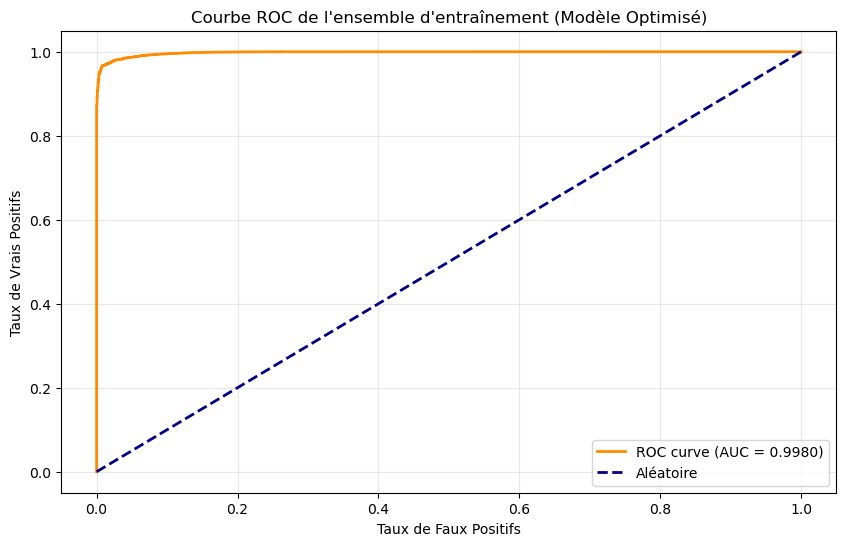

Aire sous la courbe PR :
0.9865360279017404


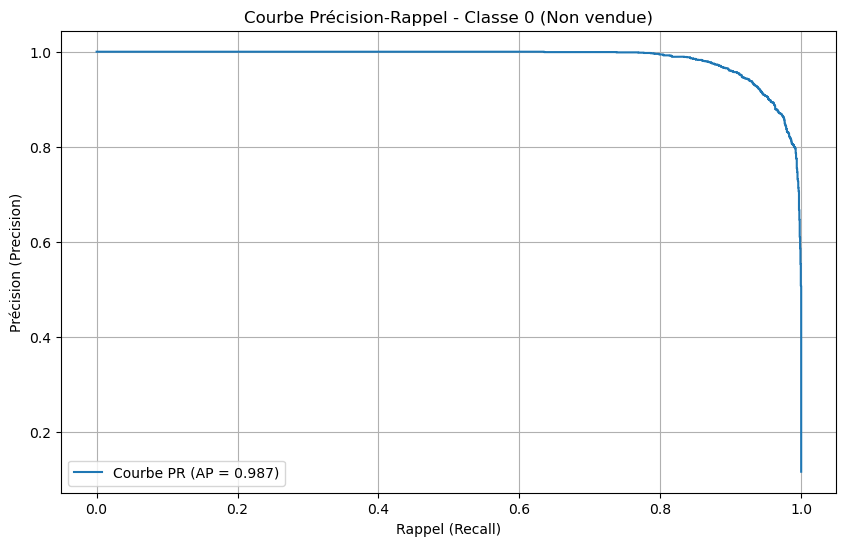

In [143]:
print("--- Métrique de l'ensemble d'entrainement (modèle optimisé) ---")

# Matrice de confusion
conf_matrix_train_opti_rf = confusion_matrix(datas_train_y, train_opti_predict)

print("\nMatrice de Confusion Random Forest (modèle optimisé) :\n", conf_matrix_train_opti_rf)

# Rapport de classification
class_report_train_opti_rf = classification_report(datas_train_y, train_opti_predict)

print("\nRapport de Classification Random Forest (modèle optimisé) :\n", class_report_train_opti_rf)

# AUC-ROC
train_proba_opti = rf_opti_model.predict_proba(datas_train_x)[:, 1]  # Classe 1
roc_auc_train_opti_rf = roc_auc_score(datas_train_y, train_proba_opti)

print("\nAUC-ROC Random Forest (modèle optimisé) :")
print(roc_auc_train_opti_rf) # 0.95838

# Courbe ROC
y_proba_rf = rf_opti_model.predict_proba(datas_train_x)[:, 1]
false_positiv_percentage_rf, true_positiv_percentage_rf, thresholds_rf = roc_curve(datas_train_y, y_proba_rf)

# Aire sous la courbe ROC
under_curve_train_opti_auc = auc(false_positiv_percentage_rf, true_positiv_percentage_rf)

print("\nAire sous la courbe ROC (modèle optimisé) :")
print(under_curve_train_opti_auc)

# Affichage de la courbe
plt.figure(figsize = (10, 6))

plt.plot(
    false_positiv_percentage_rf, true_positiv_percentage_rf,
    color = 'darkorange',
    lw = 2,
    label = f'ROC curve (AUC = {under_curve_train_opti_auc:.4f})'
)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Aléatoire')
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC de l'ensemble d'entraînement (Modèle Optimisé)")
plt.legend(loc = "lower right")
plt.grid(True, alpha = 0.3)
plt.show()

# Pour la classe 0 (minoritaire)
y_proba_0 = rf_opti_model.predict_proba(datas_train_x)[:, 0]  # Probabilités pour la classe 0
precision, recall, thresholds = precision_recall_curve(datas_train_y, y_proba_0, pos_label = 0)

# Aire sous la courbe PR
ap_score = average_precision_score(datas_train_y, y_proba_0, pos_label = 0)

print("Aire sous la courbe PR :")
print(ap_score)

# Affichage de la courbe 
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label = f'Courbe PR (AP = {ap_score:.3f})')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Précision-Rappel - Classe 0 (Non vendue)')
plt.legend()
plt.grid(True)
plt.show()

Ensemble de validation (modèle optimisé) :

--- Métrique de l'ensemble de validation (modèle optimisé) ---

Matrice de Confusion Random Forest (modèle optimisé) :
 [[ 436   44]
 [  25 3623]]

Rapport de Classification Random Forest (modèle optimisé) :
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       480
           1       0.99      0.99      0.99      3648

    accuracy                           0.98      4128
   macro avg       0.97      0.95      0.96      4128
weighted avg       0.98      0.98      0.98      4128


AUC-ROC (Random Forest) (modèle optimisé) :
0.995946408991228

Aire sous la courbe ROC (modèle optimisé) :
0.995946408991228


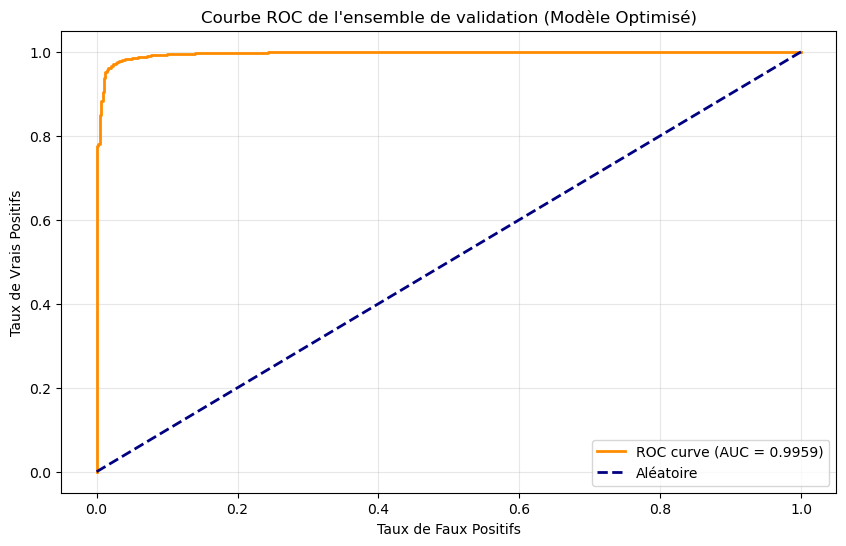

Aire sous la courbe PR :
0.9762913611630928


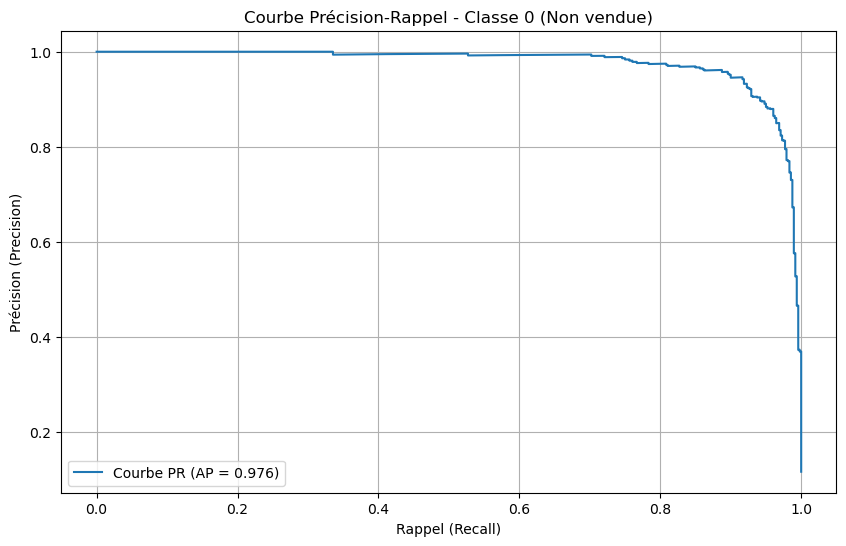

In [144]:
print("--- Métrique de l'ensemble de validation (modèle optimisé) ---")

# Matrice de confusion
conf_matrix_valid_opti_rf = confusion_matrix(datas_valid_y, valid_opti_predict)

print("\nMatrice de Confusion Random Forest (modèle optimisé) :\n", conf_matrix_valid_opti_rf)

# Rapport de classification
class_report_valid_opti_rf = classification_report(datas_valid_y, valid_opti_predict)

print("\nRapport de Classification Random Forest (modèle optimisé) :\n", class_report_valid_opti_rf)

# AUC-ROC
valid_proba_opti = rf_opti_model.predict_proba(datas_valid_x)[:, 1]  # Classe 1
roc_auc_valid_opti_rf = roc_auc_score(datas_valid_y, valid_proba_opti)

print("\nAUC-ROC (Random Forest) (modèle optimisé) :")
print(roc_auc_valid_opti_rf) # 0.95074

# Courbe ROC
y_proba_rf = rf_opti_model.predict_proba(datas_valid_x)[:, 1]
false_positiv_percentage_rf, true_positiv_percentage_rf, thresholds_rf = roc_curve(datas_valid_y, y_proba_rf)

# Aire sous la courbe ROC
under_curve_valid_opti_auc = auc(false_positiv_percentage_rf, true_positiv_percentage_rf)

print("\nAire sous la courbe ROC (modèle optimisé) :")
print(under_curve_valid_opti_auc)

# Affichage de la courbe
plt.figure(figsize = (10, 6))

plt.plot(
    false_positiv_percentage_rf, true_positiv_percentage_rf,
    color = 'darkorange',
    lw = 2,
    label = f'ROC curve (AUC = {under_curve_valid_opti_auc:.4f})'
)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--', label = 'Aléatoire')
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC de l'ensemble de validation (Modèle Optimisé)")
plt.legend(loc = "lower right")
plt.grid(True, alpha = 0.3)
plt.show()

# Pour la classe 0 (minoritaire)
y_proba_0 = rf_opti_model.predict_proba(datas_valid_x)[:, 0]  # Probabilités pour la classe 0
precision, recall, thresholds = precision_recall_curve(datas_valid_y, y_proba_0, pos_label = 0)

# Aire sous la courbe PR
ap_score = average_precision_score(datas_valid_y, y_proba_0, pos_label = 0)

print("Aire sous la courbe PR :")
print(ap_score)

# Affichage de la courbe 
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label = f'Courbe PR (AP = {ap_score:.3f})')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Précision-Rappel - Classe 0 (Non vendue)')
plt.legend()
plt.grid(True)
plt.show()

### Avantage :

### Limite :

### Validation croisée :

La validation croisée (en anglais : Cross-Validation) est une technique statistique essentielle utilisée en Machine Learning pour évaluer la performance de généralisation d'un modèle de manière plus robuste et fiable que la simple division en un seul ensemble d'entraînement et de validation.

Le but de la validation croisée est de permettre au modèle choisi de l’entraîner sur plusieurs ensembles d’entraînement différents qui proviennent tous du même jeu de donnée afin de tester le modèle sur plusieurs cas.


**Stratified K-Fold** :

On divise le jeu de donnée en plusieurs ensemble K équitable.

Ensuite on désigne un ensemble comme étant l’ensemble de validation et le reste sont désigner comme étant des ensembles d’entraînements.

Ces sous-ensembles sont appelés ‘plis’.

On effectue le test et on calcul l’erreur de validation.

Enfin on répète le processus en désignant de nouveau un ensemble de validations et des ensembles d’entraînements à chaque itération.

La performance finale du modèle que l’on cherche est la moyenne des erreurs de validation obtenues.

À savoir que les plis sont inchangeables pendant le processus d’entraînement (c’est-à-dire tant que toutes les itérations ne ce sont pas terminer). 

Cela permet que tous les plis aient été utiliser au moins une fois et donc d’assurer la généralisation.

On définit la variable cible 'y' et les variables indépendantes 'x' à partir du jeu de donnée qui ne contient que les variables séléctionés :

In [145]:
# Variable Cible (y) : Si la maison a été acheter
datas_selected_y = data_selected["Sold6M"].copy()

print("Variable cible 'y' pour les K ensembles :")
print(datas_selected_y.head())

# Caractéristiques (X) : Toutes les autres colonnes
datas_selected_x = data_selected.drop("Sold6M", axis = 1).copy()

print("\nVariable indépendante 'x' pour les K ensembles:")
print(datas_selected_x.head())

Variable cible 'y' pour les K ensembles :
0    1
1    0
2    1
3    1
4    1
Name: Sold6M, dtype: int64

Variable indépendante 'x' pour les K ensembles:
   lat_long_interaction  housing_median_age  households  median_income  \
0            -4630.0724                41.0       126.0         8.3252   
1            -4627.2492                21.0      1138.0         8.3014   
2            -4626.7840                52.0       177.0         7.2574   
3            -4627.1625                52.0       219.0         5.6431   
4            -4627.1625                52.0       259.0         3.8462   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4 

Application de la validation croisée pour le modèle standard :

In [146]:
# Stratégie de validation (K = 5)
standard_cv_strategy = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Dictionnaire de métriques d'intérêt
# On cible la catégorie 0 (pos_label = 0) pour les métriques suivantes : précision, rappel, F1
scoring = {
    'precision_0': make_scorer(precision_score, pos_label = 0),
    'recall_0': make_scorer(recall_score, pos_label = 0),
    'f1_0': make_scorer(f1_score, pos_label = 0),
    'roc_auc_ovr': 'roc_auc_ovr',  # AUC-ROC "One-vs-Rest", adaptée aux classes déséquilibrées
    'pr_curve': 'average_precision'  # AUC-PR (moyenne pondérée par le support)
}

# Préparation de la validation croisée
cv_results = cross_validate(
    rf_standard_model, # Modèle choisi
    datas_selected_x,
    datas_selected_y,
    cv = standard_cv_strategy, # Stratégie validation croisée choisi
    scoring = scoring,
    return_train_score = True, # Pour voir les scores sur l'entraînement aussi (détecte overfit)
    n_jobs = -1
)

# Application de la validation croisée et affichage de la moyenne des résultats pour chaque métrique
print("\n=== RÉSULTATS VALIDATION CROISÉE (MOYENNE pour K = 5) ===")

for metric_name in scoring.keys():

    test_scores = cv_results[f'test_{metric_name}']
    train_scores = cv_results.get(f'train_{metric_name}', 'N/A')

    print(f"{metric_name} :")
    print(f"  Test  -> Moyenne: {test_scores.mean():.4f} | Écart-type: {test_scores.std():.4f}")

    if isinstance(train_scores, np.ndarray):
        print(f"  Train -> Moyenne: {train_scores.mean():.4f} | Écart-type: {train_scores.std():.4f}")

    print()


=== RÉSULTATS VALIDATION CROISÉE (MOYENNE pour K = 5) ===
precision_0 :
  Test  -> Moyenne: 0.9354 | Écart-type: 0.0097
  Train -> Moyenne: 1.0000 | Écart-type: 0.0000

recall_0 :
  Test  -> Moyenne: 0.9201 | Écart-type: 0.0137
  Train -> Moyenne: 1.0000 | Écart-type: 0.0000

f1_0 :
  Test  -> Moyenne: 0.9276 | Écart-type: 0.0075
  Train -> Moyenne: 1.0000 | Écart-type: 0.0000

roc_auc_ovr :
  Test  -> Moyenne: 0.9953 | Écart-type: 0.0015
  Train -> Moyenne: 1.0000 | Écart-type: 0.0000

pr_curve :
  Test  -> Moyenne: 0.9990 | Écart-type: 0.0004
  Train -> Moyenne: 1.0000 | Écart-type: 0.0000



Application de la validation croisée pour le modèle optimisé :

In [147]:
# Stratégie de validation (K = 5)
opti_cv_strategy = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Dictionnaire de métriques d'intérêt
# On cible la catégorie 0 (pos_label = 0) pour les métriques suivantes : précision, rappel, F1
scoring = {
    'precision_0': make_scorer(precision_score, pos_label = 0),
    'recall_0': make_scorer(recall_score, pos_label = 0),
    'f1_0': make_scorer(f1_score, pos_label = 0),
    'roc_auc_ovr': 'roc_auc_ovr',  # AUC-ROC "One-vs-Rest", adaptée aux classes déséquilibrées
    'pr_curve': 'average_precision'  # AUC-PR (moyenne pondérée par le support)
}

# Préparation de la validation croisée
cv_results = cross_validate(
    rf_opti_model, # Modèle choisi
    datas_selected_x,
    datas_selected_y,
    cv = opti_cv_strategy, # Stratégie validation croisée choisi
    scoring = scoring,
    return_train_score = True, # Pour voir les scores sur l'entraînement aussi (détecte overfit)
    n_jobs = -1
)

# Application de la validation croisée et affichage de la moyenne des résultats pour chaque métrique
print("\n=== RÉSULTATS VALIDATION CROISÉE (MOYENNE pour K = 5) ===")

for metric_name in scoring.keys():

    test_scores = cv_results[f'test_{metric_name}']
    train_scores = cv_results.get(f'train_{metric_name}', 'N/A')

    print(f"{metric_name} :")
    print(f"  Test  -> Moyenne: {test_scores.mean():.4f} | Écart-type: {test_scores.std():.4f}")

    if isinstance(train_scores, np.ndarray):
        print(f"  Train -> Moyenne: {train_scores.mean():.4f} | Écart-type: {train_scores.std():.4f}")

    print()


=== RÉSULTATS VALIDATION CROISÉE (MOYENNE pour K = 5) ===
precision_0 :
  Test  -> Moyenne: 0.9287 | Écart-type: 0.0100
  Train -> Moyenne: 0.9455 | Écart-type: 0.0023

recall_0 :
  Test  -> Moyenne: 0.9084 | Écart-type: 0.0131
  Train -> Moyenne: 0.9230 | Écart-type: 0.0015

f1_0 :
  Test  -> Moyenne: 0.9183 | Écart-type: 0.0053
  Train -> Moyenne: 0.9341 | Écart-type: 0.0018

roc_auc_ovr :
  Test  -> Moyenne: 0.9957 | Écart-type: 0.0012
  Train -> Moyenne: 0.9980 | Écart-type: 0.0001

pr_curve :
  Test  -> Moyenne: 0.9993 | Écart-type: 0.0003
  Train -> Moyenne: 0.9997 | Écart-type: 0.0000

